# Geometric objects - Spatial data model

## Overview of geometric objects and the the `shapely` module

The most fundamental geometric objects are **Points**, **Lines** and
**Polygons** which are the basic ingredients when working with spatial
data in vector format. Python has a specific module called
[shapely](http://toblerity.org/shapely/manual.html) that can be
used to create and work with *Geometric Objects*. There are many useful
functionalities that you can do with Shapely such as:

-  Create a **Line** or **Polygon** from a *Collection* of
   **Point** geometries
-  Calculate areas/length/bounds etc. of input geometries
-  Make geometric operations based on the input geometries such as
   **Union**, **Difference**, **Distance** etc.
-  Make spatial queries between geometries such **Intersects**,
   **Touches**, **Crosses**, **Within** etc.

**Geometric Objects consist of coordinate tuples where:**

-  **Point** -object represents a single point in space. Points can be
   either two-dimensional (x, y) or three dimensional (x, y, z).
-  **LineString** -object (i.e. a line) represents a sequence of points
   joined together to form a line. Hence, a line consist of a list of at
   least two coordinate tuples
-  **Polygon** -object represents a filled area that consists of a list
   of at least three coordinate tuples that forms the outerior ring and
   a (possible) list of hole polygons.

**It is also possible to have a collection of geometric objects (e.g.
Polygons with multiple parts):**

-  **MultiPoint** -object represents a collection of points and consists
   of a list of coordinate-tuples
-  **MultiLineString** -object represents a collection of lines and
   consists of a list of line-like sequences
-  **MultiPolygon** -object represents a collection of polygons that
   consists of a list of polygon-like sequences that construct from
   exterior ring and (possible) hole list tuples

## Point

-  Creating point is easy, you pass x and y coordinates into Point()
   -object (+ possibly also z -coordinate):

In [ ]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)  

# What is the type of the point?
point_type = type(point1)

In [ ]:
print(point1)
print(point3D)
print(type(point1))

We can see that the type of the point is shapely's Point which is
represented in a specific format that is based on
[GEOS](https://trac.osgeo.org/geos/) C++ library that is one of the
standard libraries in GIS. It runs under the hood e.g. in [QGIS](http://www.qgis.org/en/site/). 3D-point can be recognized from
the capital Z -letter in front of the coordinates.

## Point attributes and functions

Point -object has some built-in attributes that can be accessed and also
some useful functionalities. One of the most useful ones are the ability
to extract the coordinates of a Point and calculate the Euclidian
distance between points.

Extracting the coordinates of a Point can be done in a couple of different ways:

In [ ]:
# Get the coordinates
point_coords = point1.coords

# What is the type of this?
type(point_coords)

In [ ]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

What is inside?

In [ ]:
print(xy)
print(x)
print(y)

We can see that the our xy variable contains a tuple where x and y are stored inside of a numpy arrays.
However, our x and y variables are plain decimal numbers.

It is also possible to calculate the distance between points which
can be useful in many applications
the returned distance is based on the projection of the points
(degrees in WGS84, meters in UTM)

In [20]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


---
**EXERCISE**:
Create two Points -- one at `0.5, 3.0` and another at `4.0, 5.0`.
Calculate _using the distance formula_ the distance (1) from the origin `0, 0` to each point, and (2) between the two points.

In [ ]:
# Your answers

Now, use the `distance` method to confirm that you got the same answer.

In [ ]:
# Answer...

---

## Linestring

Creating a LineString -object is fairly similar to how Point is
created. Now instead using a single coordinate-tuple we can construct
the line using either a list of shapely Point -objects or pass
coordinate-tuples:

Create a LineString from our `Point` objects:

In [ ]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

It is also possible to use coordinate tuples having the same outcome.

In [ ]:
In [21]: line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

Let's see the results:

In [ ]:
print(line)

In [ ]:
print(line2)

In [ ]:
type(line)

Ok, now we can see that variable line constitutes of multiple coordinate-pairs and the type of the data is shapely LineString.

### LineString attributes and functions

LineString -object has many useful built-in attributes and functionalities. It is for instance possible to extract the coordinates or the length of a LineString (line), calculate the centroid of the line, create points along the line at specific distance, calculate the closest distance from a line to specified Point and simplify the geometry. See full list of functionalities from [Shapely documentation](http://toblerity.org/shapely/manual.html#). Here, we go through a few of them.

We can extract the coordinates of a LineString in the same way as with a Point.

In [ ]:
lxy = line.xy
print(lxy)

OK, we can see that the coordinates are again stored as a numpy arrays where first array includes all x-coordinates and the second all the y-coordinates respectively.

We can extract only x or y coordinates by referring to those arrays as follows

In [ ]:
# Extract x coordinates
line_x = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_y = line.xy[1]

print(line_x)

print(line_y)

In [ ]:
# Get the length of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid
     
# What type is the centroid?
centroid_type = type(l_centroid)

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", centroid_type)

So these are already fairly useful information for many different
GIS tasks, and we didn't even calculate anything yet! These attributes
are built-in in every LineString object that is created. Notice that the
centroid that is returned is Point -object that has its own functions as
was described earlier.

A nice feature of Jupyter notebooks is the ability to render shapes directly in the notebook.
This isn't quite the same as plotting, but it's a nice way to visualize the shapes you're producing.

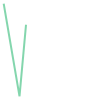

In [22]:
line

Here's a crude sketch of the number 7.

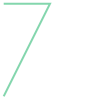

In [24]:
LineString([(0.0, 3.0), (1.5, 3.0), (0.0, 0.0)])

---
**EXERCISE**:
Create a `LineString` of (1) the number 2, and (2) the number 5 as they would appear on an alarm clock.

For each number, what is the (1) centroid, and (2) length?

In [ ]:
# Answer

---

## Polygon

Creating a Polygon -object continues the same logic of how Point and
LineString were created but Polygon object only accepts
coordinate-tuples as input. Polygon needs at least three
coordinate-tuples:

In [30]:
# Let's create a bounding box of the world and make a whole in it

# First we define our exterior
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

# World without a hole
world = Polygon(shell=world_exterior)

# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)

What is the result?

In [29]:
print(world)
print(world_has_a_hole)
type(world_has_a_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


shapely.geometry.polygon.Polygon

Now we can see that the polygon has two different tuples of coordinates.
The first one represents the outerior and the second one represents the
hole inside of the Polygon.

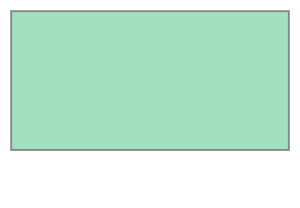

In [31]:
world

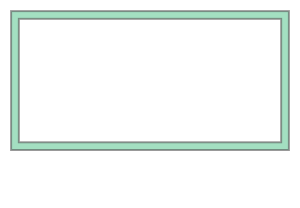

In [32]:
world_has_a_hole

### Polygon attributes and functions

Now we can see that the polygon has two different tuples of coordinates.
The first one represents the outerior and the second one represents the
hole inside of the Polygon.

In [ ]:
# Get the centroid of the Polygon
world_centroid = world.centroid

# Get the area of the Polygon
world_area = world.area

# Get the bounds of the Polygon (i.e. bounding box)
world_bbox = world.bounds

# Get the exterior of the Polygon
world_ext = world.exterior

# Get the length of the exterior
world_ext_length = world_ext.length

Let's see the result:

In [ ]:
print("Poly centroid: ", world_centroid)
print("Poly Area: ", world_area)
print("Poly Bounding Box: ", world_bbox)
print("Poly Exterior: ", world_ext)
print("Poly Exterior Length: ", world_ext_length)

---
**EXERCISE**:
Create shapes for the following Polygons.
For each shape, display it in the notebook, and calculate its centroid, area, bounding box, and perimeter.

- Square
- Equilateral triangle
- Isosceles triangle
- Pentagon
- Hexagon
- Pac Man
---

## Geometry collections

In some occassions it is useful to store e.g. multiple lines or polygons
under a single feature (i.e. a single row in a Shapefile represents more
than one line or polygon object). Collections of points are implemented
by using a MultiPoint object, collections of curves by using a
MultiLineString object, and collections of surfaces by a MultiPolygon
object. These collections are not computationally significant, but are
useful for modeling certain kinds of features. A Y-shaped line feature
(such as road), or multiple polygons (e.g. islands on a like), can be
presented nicely as a whole by a using MultiLineString or MultiPolygon
accordingly. Creating and visualizing a [minimum bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_box) e.g. around
your data points is a really useful function for many purposes (e.g.
trying to understand the extent of your data), here we demonstrate how
to create one using Shapely.

Geometry collections can be constructed in a following manner:


In [ ]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])


Let's see the results.

In [ ]:
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)

### Geometry collection attributes and function

We can also get many useful attributes from those objects:

In [ ]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
multi_point.convex_hull

In [ ]:
# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)

In [ ]:
# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

In [ ]:
We can also access different items inside our geometry collections. We can e.g. access a single polygon from
our MultiPolygon -object by referring to the index

In [ ]:
# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area

# We can check if we have a "valid" MultiPolygon. MultiPolygon is thought as valid if the individual polygons
# does notintersect with each other. Here, because the polygons have a common 0-meridian, we should NOT have
# a valid polygon. This can be really useful information when trying to find topological errors from your data
valid = multi_poly.is_valid

---
**EXERCISE**:
Use the appropriate geometries to draw the following:

- The number 53 (with straight lines, as it would appear on a calculator or alarm clock)
- Two pine trees side by side

In [ ]:
# Answers

---